In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [4]:
import torch
from FittedModels.utils.plotting_utils import plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.train import LearntDistributionManager
from Utils.numerical_utils import quadratic_function as expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils.plotting_utils import plot_history
import matplotlib.pyplot as plt
from TargetDistributions.VincentTargets import TwoModes
from FittedModels.utils.plotting_utils import plot_samples_vs_contours
from FittedModels.utils.plotting_utils import plot_distributions
torch.set_default_dtype(torch.float64)

# First Let's Train using as similar as possible parameters to Vincent

In [13]:
# using the same as Vincent's code so we have a fair comparison
# ******************* Parameters *******************
dim = 2
epochs = int(1e4)
n_samples_estimation = int(1e5)
batch_size = 20
lr = 3e-4
train_prior = False
weight_decay = 1e-6
optimizer = "Adam" # "AdamW" # "Adamax"  
flow_type = "IAF" # "RealNVP"  # 
loss_type = "kl"  # "DReG" # "kl"  #    #
initial_flow_scaling = 1.0
n_flow_steps = 8
annealing=False

In [14]:
torch.manual_seed(1)
target = TwoModes(2.0, 0.1)

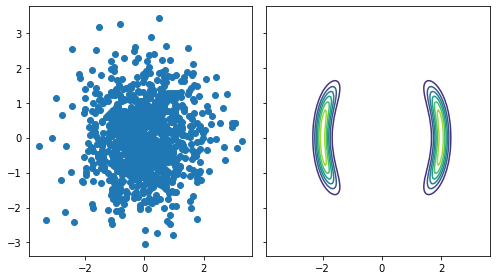

In [15]:
torch.manual_seed(1)
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing, weight_decay=weight_decay)

plot_samples_vs_contours(tester)
plt.show()
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

loss: 12.739959009546508, mean log p_x -15.419848791989843: 100%|██████████| 10000/10000 [23:33<00:00,  7.08it/s]


estimate before training is 8.34371181565396 
estimate after training is 8.310471393111412 
effective sample size before is 0.07209702149269331
effective sample size after train is 0.0007649152736559833
variance in weights is 1.3063473976665874e-07


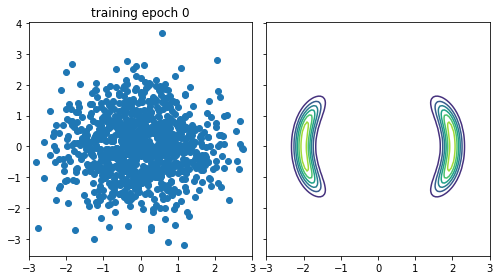

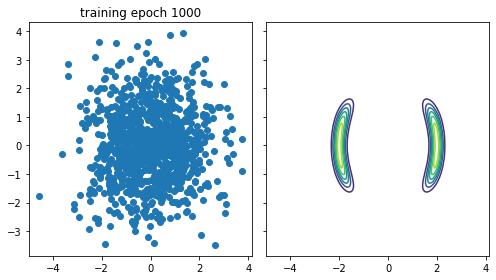

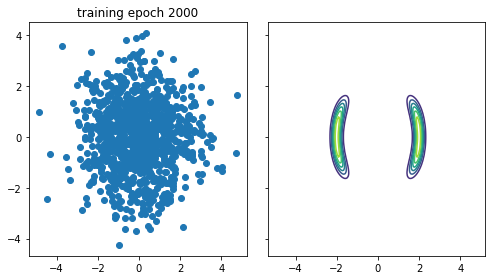

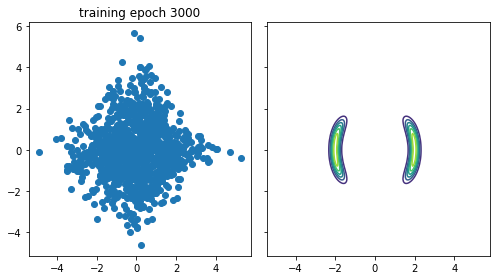

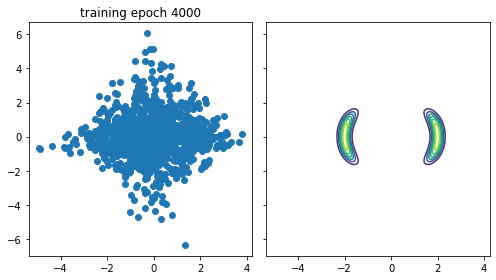

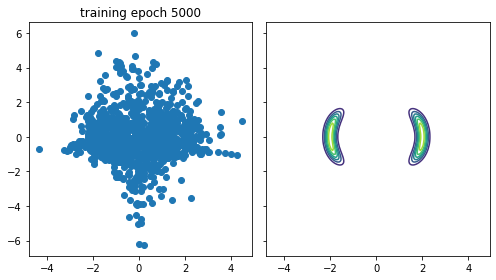

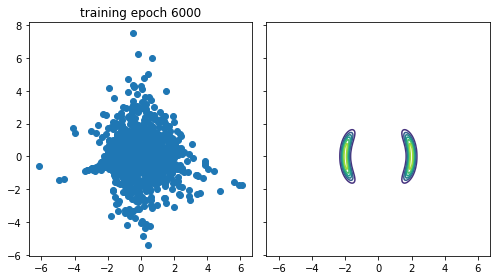

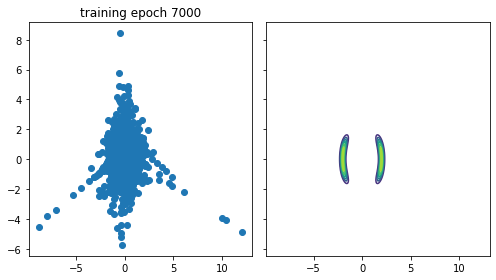

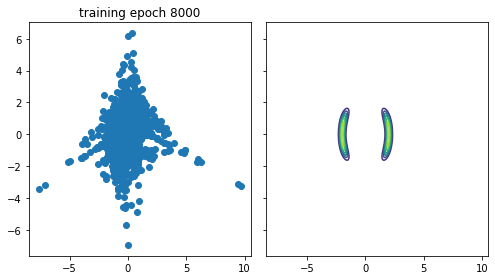

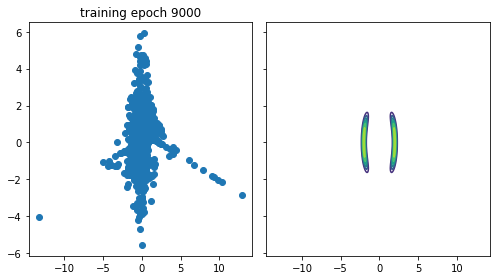

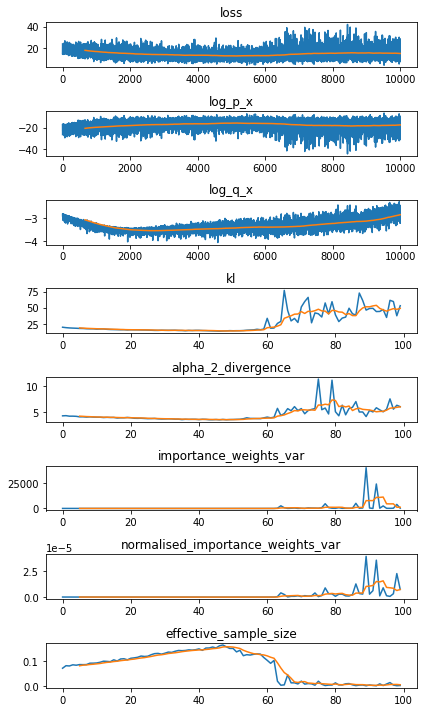

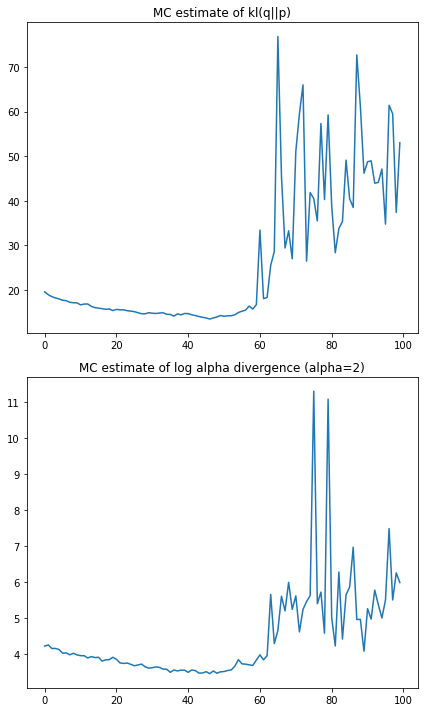

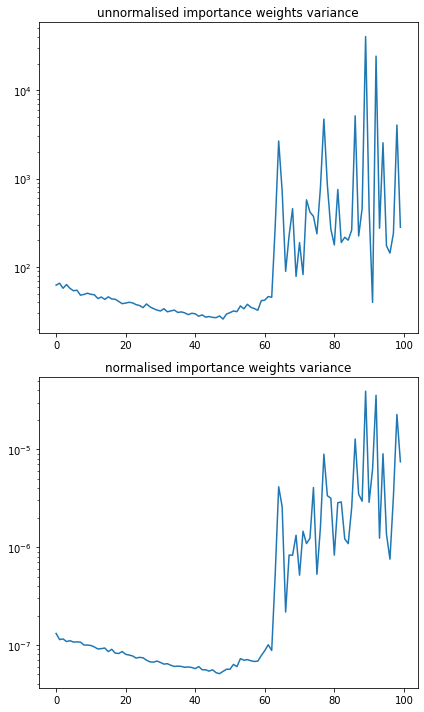

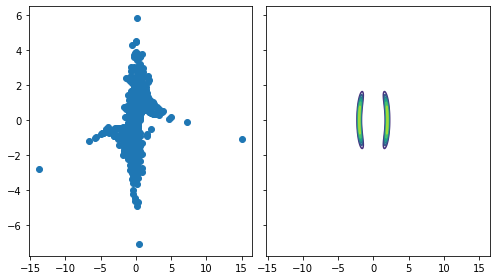

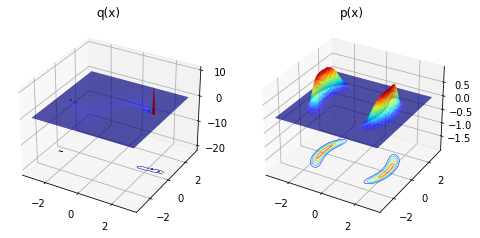

In [16]:
if train_prior:
    history_prior = tester.train_prior(epochs=200, batch_size=batch_size, lr=0.01)
    plot_history(history_prior)
    plt.show()
    plot_samples_vs_contours(tester)
    plt.show()


expectation_prior_trained, info_prior = tester.estimate_expectation(n_samples_estimation, expectation_function)

history = tester.train(epochs, batch_size=batch_size, clip_grad_norm=True, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plot_samples_vs_contours)

plot_history(history)
plot_divergences(history)
plot_sampling_info(history)

expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

if train_prior:
    print(f"estimate after prior training is {expectation_prior_trained} \n"
        f"effective sample size trained prior is {info_prior['effective_sample_size'] / n_samples_estimation}\n")

plot_samples_vs_contours(tester, n_samples=1000)

try:
    plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)
except:
    print("coudln't plot on grid")

# Now let's try alpha=2 divergence

In [3]:
# ******************* Parameters *******************
dim = 2
epochs = int(2e4)
n_samples_estimation = int(1e5)
batch_size = 20
lr = 1e-4
train_prior = False
weight_decay = 1e-6
optimizer = "Adam" # "Adamax"
flow_type = "RealNVP"  # "IAF"
loss_type = "kl"  # "DReG" # "kl"  #    #
initial_flow_scaling = 1.0
n_flow_steps = 64
annealing=True

In [4]:
torch.manual_seed(1)
target = TwoModes(2.0, 0.1)

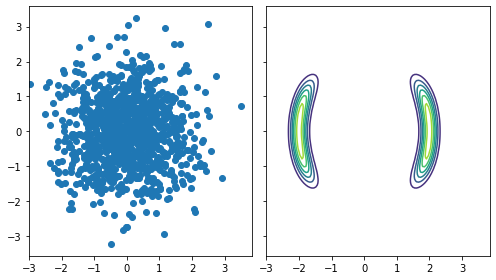

In [5]:
torch.manual_seed(1)
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing, weight_decay=weight_decay)

plot_samples_vs_contours(tester)
plt.show()
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

loss: -2.7933223247528076, mean log p_x -23.168973922729492:   0%|          | 0/20000 [00:00<?, ?it/s]

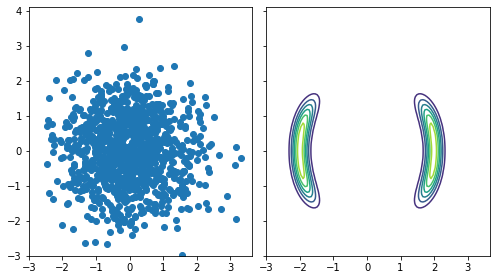

loss: -2.4279956817626953, mean log p_x -20.001554489135742:   1%|▏         | 258/20000 [00:58<1:13:15,  4.49it/s]

In [ ]:
if train_prior:
    history_prior = tester.train_prior(epochs=200, batch_size=batch_size, lr=0.01)
    plot_history(history_prior)
    plt.show()
    plot_samples_vs_contours(tester)
    plt.show()


expectation_prior_trained, info_prior = tester.estimate_expectation(n_samples_estimation, expectation_function)

history = tester.train(epochs, batch_size=batch_size, clip_grad_norm=True, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plot_samples_vs_contours)

plot_history(history)
plot_divergences(history)
plot_sampling_info(history)

expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

if train_prior:
    print(f"estimate after prior training is {expectation_prior_trained} \n"
        f"effective sample size trained prior is {info_prior['effective_sample_size'] / n_samples_estimation}\n")

plot_samples_vs_contours(tester, n_samples=1000)

try:
    plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)
except:
    print("coudln't plot on grid")